In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/home/hiramatsu/kaggle/hms-harmful-brain-activity-classification/data/train.csv")
train

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [49]:
label_list = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]

train[label_list] /= train[label_list].sum(axis=1).values[:, None]

train['vote_max_value'] = train[label_list].max(axis=1)
train['vote_max'] = np.argmax(train[label_list].values, axis=1)


vote_second_max_values = []
vote_second_max = []
for value in train[label_list].values:
    vote_second_max_values.append(np.sort(value)[-2])
    vote_second_max.append(np.argsort(value)[-2])



train['vote_second_max_value'] = vote_second_max_values
train['vote_second_max'] = vote_second_max


train

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,vote_max_value,vote_max,vote_second_max_value,vote_second_max
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5


In [18]:
train.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,vote_max_value,vote_max,vote_second_max_value,vote_second_max
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.208319,0.132120,0.128533,0.138913,0.179294,0.212822,0.816009,2.506217,0.142184,3.939036
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,0.378275,0.277731,0.276172,0.280059,0.336370,0.315197,0.208296,1.764663,0.158522,1.620060
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,0.000000,3.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571,3.000000,0.066667,5.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,0.200000,0.066667,0.000000,0.076923,0.153846,0.333333,1.000000,4.000000,0.312500,5.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.500000,5.000000


In [50]:
train['target_level'] = "Edge"

train.loc[(train['vote_max_value'] > 0.7), 'target_level'] = "Idealized"
train.loc[(train['vote_max_value'] <= 0.7) & (train['vote_second_max'] == 5), 'target_level'] = "Proto"

train

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,vote_max_value,vote_max,vote_second_max_value,vote_second_max,target_level
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5,Idealized
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5,Idealized
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5,Idealized
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5,Idealized
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,5,Idealized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5,Idealized
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5,Idealized
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5,Idealized
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,0.0,5,Idealized


In [6]:
# descriptionに書いてあるように、観測結果の投票の割れ方に応じてデータのパターンを分割して新しい列「pattern」を作る

target_cols = [col for col in train.columns if '_vote' in col]
train_group = train.groupby('eeg_id')[target_cols].sum().reset_index()

def categorize_votes(row):    # row:行
    # 投票数の最大値と合計を計算
    col_names = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
    max_vote = row[col_names].max()
    total_votes = row[col_names].sum()
    second_opinion = row[col_names[:-1]].sort_values(ascending=False).to_list()[1]

    # expert_consensusへの投票率を計算
    percentage = max_vote / total_votes * 100
    second_percentage = second_opinion / total_votes * 100

    high_agreement_threshold = 70
    equal_splitting_threshold = 40

    # expert_consensusへの投票率70％の時
    if percentage >= high_agreement_threshold:    
        return 'idealized'
    # expert_consensusへの投票率40%以上かつ「other」への投票率も40％超えるとき
    elif row['other_vote'] / total_votes >= 0.4 and percentage >= equal_splitting_threshold:
        return 'proto'
    # 「expert_consesnsu、other」以外の一意の脳波への投票が40%以上，かつexpert_consensusへの投票率が40％超えるとき
    elif second_percentage >= equal_splitting_threshold and percentage >= equal_splitting_threshold:
        return 'edge'
    # それ以外（専門家による見解にかなりの相違がみられる場合）
    else:
        return 'undecided'

# 「pattern」列作成（生データでは各行の投票数少ないため、eeg_idでグルーピングしたデータフレームに追加する）
train_group['pattern'] = train_group.apply(categorize_votes, axis=1)

# patternの分布の可視化
df = train_group['pattern'].value_counts().sort_values(ascending=False).reset_index()

train_group.head(7)

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,pattern
0,568657,0,0,12,0,8,28,proto
1,582999,0,132,0,11,0,11,idealized
2,642382,0,0,0,0,0,2,idealized
3,751790,0,0,1,0,0,0,idealized
4,778705,0,0,0,0,0,2,idealized
5,1629671,51,0,0,0,0,0,idealized
6,1895581,1,0,0,0,1,11,idealized


In [7]:
train_group = pd.get_dummies(train_group, columns=['pattern'], dtype=int)
train_group

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,pattern_edge,pattern_idealized,pattern_proto,pattern_undecided
0,568657,0,0,12,0,8,28,0,0,1,0
1,582999,0,132,0,11,0,11,0,1,0,0
2,642382,0,0,0,0,0,2,0,1,0,0
3,751790,0,0,1,0,0,0,0,1,0,0
4,778705,0,0,0,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17084,4293354003,0,0,0,0,1,1,0,0,1,0
17085,4293843368,0,0,0,0,1,1,0,0,1,0
17086,4294455489,0,0,0,0,0,1,0,1,0,0
17087,4294858825,0,0,0,0,5,70,0,1,0,0


In [9]:
train_group[["eeg_id", "pattern_edge", "pattern_idealized", "pattern_proto", "pattern_undecided"]].to_csv("/home/hiramatsu/kaggle/hms-harmful-brain-activity-classification/outputs/target_pattern.csv", index=False)

In [42]:
import matplotlib.pyplot as plt

<Axes: >

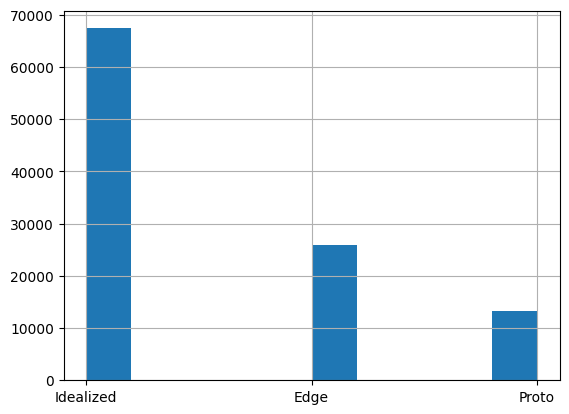

In [51]:
train['target_level'].hist()

In [57]:
target_level = train[['label_id', 'target_level']]
original_df = pd.read_csv("/home/hiramatsu/kaggle/hms-harmful-brain-activity-classification/data/train.csv")

original_df = original_df.merge(target_level, how='left', on='label_id')
original_df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,target_level
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,Idealized
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,Idealized
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,Idealized
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,Idealized
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,Idealized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0,Idealized
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0,Idealized
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0,Idealized
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0,Idealized


In [58]:
target_level = pd.get_dummies(target_level, columns=['target_level'], dtype=int)
target_level

,label_id,target_level_Edge,target_level_Idealized,target_level_Proto
0,127492639,0,1,0
1,3887563113,0,1,0
2,1142670488,0,1,0
3,2718991173,0,1,0
4,3080632009,0,1,0
...,...,...,...,...
106795,4195677307,0,1,0
106796,290896675,0,1,0
106797,461435451,0,1,0
106798,3786213131,0,1,0


In [59]:
target_level.to_csv("/home/hiramatsu/kaggle/hms-harmful-brain-activity-classification/outputs/target_level.csv", index=False)

,label_id,target_level_Edge,target_level_Idealized,target_level_Proto
0,127492639,False,True,False
1,3887563113,False,True,False
2,1142670488,False,True,False
3,2718991173,False,True,False
4,3080632009,False,True,False
...,...,...,...,...
106795,4195677307,False,True,False
106796,290896675,False,True,False
106797,461435451,False,True,False
106798,3786213131,False,True,False
